In [1]:
import numpy as np
#import cv2
framerate = 29.18

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
%cd "D:\Interfacial Waves resonance videos 0419"
%cd interfaceResponse/

[WinError 21] Az eszköz nem áll készen: 'D:\\Interfacial Waves resonance videos 0419'
C:\Users\balin\Docs\boSchlieren
[WinError 2] A rendszer nem találja a megadott fájlt: 'interfaceResponse/'
C:\Users\balin\Docs\boSchlieren


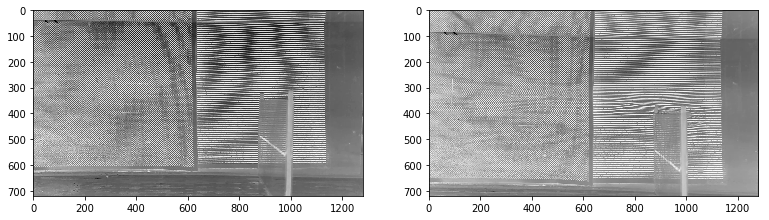

In [2]:
import numpy as np
import matplotlib.pyplot as plt

water = cv2.flip(cv2.imread("reference/frame200.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("rampSlow/frame1518.jpg", cv2.IMREAD_GRAYSCALE), -1)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))

cv2.equalizeHist(water)
cv2.equalizeHist(img)
ax1.imshow(water, cmap='Greys')
ax2.imshow(img, cmap='Greys')


plt.show()


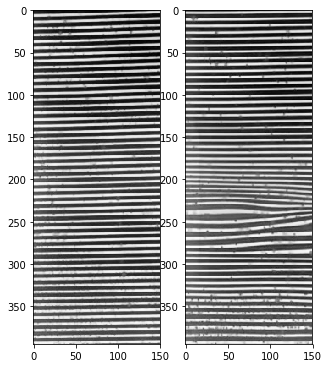

In [3]:
imgcut = img[120:515, 650:800]
refcut = water[100:495, 650:800]
f, (ax1, ax2) = plt.subplots(1,2, figsize=(5,13))
ax1.imshow(refcut, cmap='Greys')
ax2.imshow(imgcut, cmap='Greys')

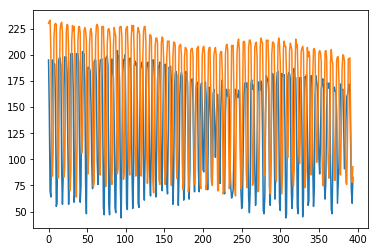

In [32]:
plt.plot(imgref)
plt.plot(refref)


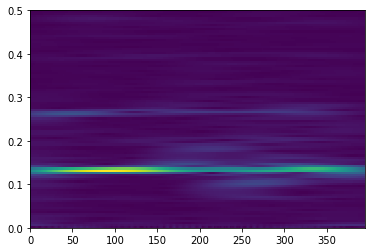

In [67]:
from scipy import signal

f, t, Zxx = signal.stft(imgref, 1, nperseg=200,noverlap=199, detrend='constant')

f2, t2, Zxx2 = signal.stft(refref, 1, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx2-Zxx))
asdd = np.argmax( np.abs(Zxx2-Zxx)[:,100])

(array([246], dtype=int64),)


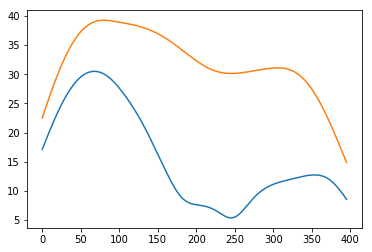

In [68]:
plt.plot(t, np.abs(Zxx[asdd]) )
plt.plot(t, np.abs(Zxx2[asdd]) )
from scipy.signal import argrelextrema

print(argrelextrema(np.abs(Zxx2[asdd]), np.less))


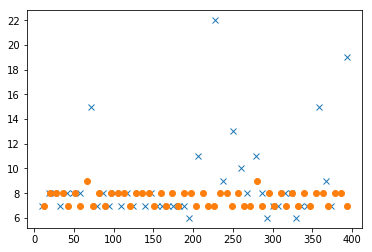

In [13]:
refref = refcut[:, 50]
imgref = imgcut[:, 50]

peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.3)
peaks, _ = find_peaks(normalize(255.-refref), height=0.9)
plt.plot(peaksimg[1:], np.abs((np.diff(peaksimg))), "x")
plt.plot(peaks[1:], np.abs((np.diff(peaks))), "o")


In [ ]:
len(peaks)

In [ ]:
peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.)
np.abs((np.diff(peaksimg)))

In [5]:
def peaksimgs(h):
    peaksimg, _ = find_peaks(normalize(255.-imgref), height=h)
    return np.abs((np.diff(peaksimg)))

def whereIsPeak(x):
    avg = np.average(x)
    threshold = 1.5*np.std(x)
    filt = np.abs(x - avg) > threshold
    shorter =  np.min([len(x), len(peaks)])
    peaksimgcut = x[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff((peaksimgcut)) - np.diff((peakscut))))
    
    return shorter - maxplace

In [6]:
def selectBestH(imgref):
    heights = np.arange(1., 1.4, 0.01)
    a = []
    for h in heights:
        a.append(whereIsPeak(peaksimgs(h)))
    maxPlace = np.argmax(a) ## farthest from edge
    return heights[maxPlace]



In [ ]:
ampls = []
for i in range(1000, 1500):
    #print(i)
    img = read_file("rampSlow/frame%s.jpg" %(i))
    imgcut = img[120:515, 650:800]
    imgref = imgcut[:, 50]
    ampls.append(selectBestH(imgref))

In [ ]:
plt.plot(ampls, 'o')

In [ ]:
asd = np.arange(1., 1.4, 0.01)
a = []
for asdd in asd:
    a.append(countOutliers(peaksimgs(asdd)))
    
plt.plot(asd, a, 'o')

In [ ]:
np.std(np.abs((np.diff(peaksimg))))

In [ ]:
plt.plot((255.-imgref))
plt.plot((255.-refref))

In [9]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img


def printMaxAmpl(img, ref, col, loc):
    img = img[120:515, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)
    imgref = img[:,col]
    refref = ref[:,col]
    h = selectBestH(imgref)

    peaksimg, _ = find_peaks(normalize(255.-imgref), height=h)
    peaks, _ = find_peaks(normalize(255.-refref), height=0.9)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff((peaksimgcut)) - np.diff((peakscut))))
    return [peaks[maxplace], np.max(np.abs(np.diff((peaksimgcut)) - np.diff((peakscut))))]



In [8]:
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 2.5*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 2.5*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)>2.5*std
    return filtered

def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev

In [10]:

def measureInterface(src):
    ls = os.listdir(src) # list
    number_files = len(ls)
    ref = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/reference/frame200.jpg" )
    refc = ref[100:495, 650:800]

    ampls = []
    for i in range(number_files):
        #print(i)
        img = read_file("%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img, refc,50, [650, 800]))
    return np.array(ampls)

def saveDataset(src):
    ampls = measureInterfaceSubset(src, np.arange(1300, 1800, 1))
    np.savetxt("C:/Users/balin/Docs/boSchlieren/data0419/measured/sample/%s.txt" %src, ampls)
    print('%s Done \n' %src)


In [11]:
import os

In [ ]:
52*29.18

In [ ]:
saveDataset("rampSlow")

In [14]:
rampSlow = measureInterface("rampSlow")

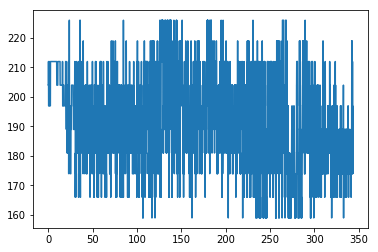

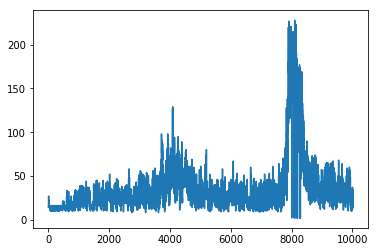

In [16]:
plt.plot(np.arange(0., rampSlow.shape[0], 1)/29.18, filterUntilSmooth(rampSlow[:,0]))
plt.show()

plt.plot(rampSlow[:,1])

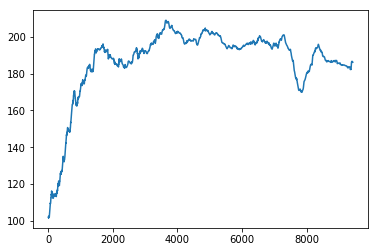

In [29]:
N = int(20*29.18)
movingAvg = np.convolve(rampSlow[:,0], np.ones((N,))/N, mode='valid')
plt.plot(movingAvg)

## Spectrum of the driving

In [ ]:
driving = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/driving/slowRamp', skiprows=2)
surface = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/surfaceresponse/slowRamp', skiprows=2)

In [ ]:
fr = 1/(driving[1,0]-driving[0,0]) ##framerate

In [ ]:
from scipy import signal

f, t, Zxx = signal.stft(driving[:,1], fr, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(t, f, np.abs(Zxx))


In [ ]:
fs, ts, Zxxs = signal.stft(surface[:,1], fr, nperseg=200,noverlap=199, detrend='constant')
plt.pcolormesh(ts, fs, np.abs(Zxxs))


In [ ]:
fra, tra, Zxxra = signal.stft(rampSlow[:,1], 1./29.18, nperseg=2000,noverlap=1999, detrend='constant')
plt.pcolormesh(tra, fra, np.abs(Zxxra))


In [ ]:
plt.plot(t, f[np.argmax(np.abs(Zxx), axis=0)], 'o')
frequencies = f[np.argmax(np.abs(Zxx), axis=0)]
plt.xlabel('Time')
plt.ylabel('Frequency [Hz]')

plt.show()


In [ ]:
from scipy import interpolate

drivingInterpolate = interpolate.interp1d(t[np.logical_and(t>20, t<350)],frequencies[np.logical_and(t>20, t<350)])

NameError: name 't' is not defined

In [ ]:
time = np.arange(0., rampSlow.shape[0], 1)/29.18
filt = np.logical_and(surface[:,0]>25, surface[:,0]<340)

In [ ]:
rampSlow[:,0] = filterUntilSmooth(rampSlow[:,0])

In [ ]:
f, axes = plt.subplots(3, 2)
axes[0][0].plot(surface[:,0][filt], surface[:,1][filt], '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(time[np.logical_and(time>25, time<340)], rampSlow[:,0][np.logical_and(time>25, time<340)], '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(drivingInterpolate(surface[:,0][filt]),  surface[:,1][filt], 'o', markersize=1, c='black')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')

axes[1][1].plot(drivingInterpolate(time[np.logical_and(time>25, time<340)]), rampSlow[:,0][np.logical_and(time>25, time<340)], 'o', markersize=1, c='black')
axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')


axes[2][0].plot((time[np.logical_and(time>25, time<340)]),  rampSlow[:,1][np.logical_and(time>25, time<340)], '-o', markersize=1, c='black')
axes[2][0].set_ylabel('Interface Width')
axes[2][0].set_xlabel('Time')

axes[2][1].plot(drivingInterpolate(time[np.logical_and(time>25, time<340)]), rampSlow[:,1][np.logical_and(time>25, time<340)], 'o', markersize=1, c='black')
axes[2][1].set_ylabel('Interface width')
axes[2][1].set_xlabel('Driving frequency [Hz]')



f.set_size_inches((13, 8))
f.tight_layout()

In [ ]:
### freqs of the non ramping experiments
frequencies = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/frequencies.txt')
interfaceRes = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/interface.txt')
surfaceRes = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/surface.txt')

In [ ]:
f, axes = plt.subplots(3, 2)
axes[0][0].plot(surface[:,0][filt], normalize(np.abs(surface[:,1][filt])), '-o', markersize=1, c='black')
axes[0][0].set_xlabel('Time')
axes[0][0].set_ylabel('Water Surface position [px]')
axes[0][0].set_title('Surface response')

axes[1][0].plot(time[np.logical_and(time>25, time<340)], normalize(np.abs(rampSlow[:,0][np.logical_and(time>25, time<340)])), '-o', markersize=1, c='black')
axes[1][0].set_xlabel('Time')
axes[1][0].set_ylabel('Interface Position [px]')
axes[1][0].set_title('Interface response')

axes[0][1].plot(drivingInterpolate(surface[:,0][filt]),  normalize(np.abs(surface[:,1][filt])), 'o', markersize=1, c='black')
axes[0][1].plot(frequencies, normalize(surfaceRes[:,1]), 'o', markersize=5, c='Crimson')
axes[0][1].set_ylabel('Surface position')
axes[0][1].set_xlabel('Driving frequency [Hz]')

axes[1][1].plot(drivingInterpolate(time[np.logical_and(time>25, time<340)]), normalize(np.abs(rampSlow[:,0][np.logical_and(time>25, time<340)])), 'o', markersize=1, c='black')
axes[1][1].plot(frequencies, normalize(interfaceRes[:,1]), 'o', markersize=5, c='Crimson')

axes[1][1].set_ylabel('Interface position')
axes[1][1].set_xlabel('Driving frequency [Hz]')


axes[2][0].plot((time[np.logical_and(time>25, time<340)]),  normalize(np.abs(rampSlow[:,1][np.logical_and(time>25, time<340)])), '-o', markersize=1, c='black')
axes[2][0].set_ylabel('Interface Width')
axes[2][0].set_xlabel('Time')

axes[2][1].plot(drivingInterpolate(time[np.logical_and(time>25, time<340)]), normalize(np.abs(rampSlow[:,1][np.logical_and(time>25, time<340)])), 'o', markersize=1, c='black')
axes[2][1].plot(frequencies, normalize(interfaceRes[:,1]), 'o', markersize=5, c='Crimson')

axes[2][1].set_ylabel('Interface width')
axes[2][1].set_xlabel('Driving frequency [Hz]')



f.set_size_inches((13, 8))
f.tight_layout()

In [9]:
time = np.arange(1300, 1800, 1.)/29.18

In [34]:
surfSample = surface[np.logical_and(surface[:,0]<65., surface[:,0]>44.)]

In [26]:
surfSample.shape

(101, 2)

In [27]:
time.shape

(500,)

In [37]:
from scipy import interpolate
drivingInterpolate = interpolate.interp1d(surfSample[:,0],surfSample[:,1])

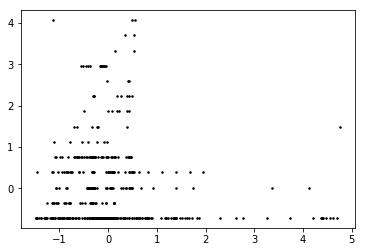

In [47]:
plt.plot(normalize(drivingInterpolate(time)), normalize(rampsubset[:,1]), 'o', markersize=1.5, c='black')

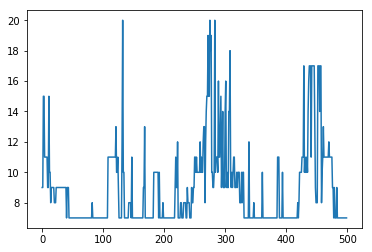

In [46]:
plt.plot(rampsubset[:,1])

- mozgóátlag
- frekvencia(t) illesztés
- turbulencia-detektálás (FT/autokorreláció)
- tükröződésből vízfelszín 
-- a papír két végén 